In [228]:
import pandas as pd

In [229]:
df = pd.read_csv("AirPassengers.csv")

In [230]:
#show me first five records 
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [231]:
# show me last five records
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [232]:
#dimention of the dataset
df.shape

(144, 2)

In [233]:
df.columns

Index(['Month', '#Passengers'], dtype='object')

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [235]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [236]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [237]:
#converting date column data type to date time
df["Date"] = pd.to_datetime(df["Month"])
df=df.drop(["Month"],axis=1)
df.head()

,#Passengers,Date
0,112,1949-01-01
1,118,1949-02-01
2,132,1949-03-01
3,129,1949-04-01
4,121,1949-05-01


In [238]:
df_new = df.set_index("Date")

In [239]:
df_new.head()

,#Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [240]:
#spliting dataset to train and test sets
split_date = '01-Dec-1957'
df_train = df_new.loc[df_new.index <= split_date].copy()
df_test = df_new.loc[df_new.index > split_date].copy()

In [241]:
print(f"Traing set shape  : {df_train.shape}\nTesting set shape : {df_test.shape}")

Traing set shape  : (108, 1)
Testing set shape : (36, 1)


In [242]:
#creating new features using existing features
def create_features(df, label=None):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)
    X = df[['hour','dayofweek','quarter','month','year',
    'dayofyear','dayofmonth','weekofyear']]

    if label:
        y = df[label]
        return X, y
    return X

In [243]:
X_train, y_train = create_features(df_train, label='#Passengers')
X_test, y_test = create_features(df_test, label='#Passengers')

Model Building

In [244]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [245]:
xgb_reg = xgb.XGBRegressor(n_estimators=1000)

In [246]:
xgb_reg.fit(X_train,y_train,
            eval_set=[(X_train,y_train),(X_test,y_test)],
            early_stopping_rounds=50,
            verbose=True)

[0]	validation_0-rmse:176.37958	validation_1-rmse:341.80021
[1]	validation_0-rmse:127.79478	validation_1-rmse:271.50308
[2]	validation_0-rmse:93.70848	validation_1-rmse:227.58095
[3]	validation_0-rmse:69.36620	validation_1-rmse:193.67212
[4]	validation_0-rmse:51.96478	validation_1-rmse:166.38394
[5]	validation_0-rmse:39.24662	validation_1-rmse:143.39513
[6]	validation_0-rmse:29.84403	validation_1-rmse:126.81946
[7]	validation_0-rmse:23.06138	validation_1-rmse:114.52723
[8]	validation_0-rmse:17.80628	validation_1-rmse:106.39957
[9]	validation_0-rmse:14.09520	validation_1-rmse:99.24999
[10]	validation_0-rmse:11.25761	validation_1-rmse:94.15344
[11]	validation_0-rmse:9.12328	validation_1-rmse:90.02051
[12]	validation_0-rmse:7.38709	validation_1-rmse:87.29590
[13]	validation_0-rmse:6.05078	validation_1-rmse:84.89879
[14]	validation_0-rmse:5.01864	validation_1-rmse:83.27107
[15]	validation_0-rmse:4.20714	validation_1-rmse:82.00225
[16]	validation_0-rmse:3.58262	validation_1-rmse:80.98196
[1

d:\data-science-projects\ml-projects-2.0\USA Airlines Passengers - Time Series Analysis\.venv\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[49]	validation_0-rmse:0.19374	validation_1-rmse:76.54644
[50]	validation_0-rmse:0.18376	validation_1-rmse:76.54383
[51]	validation_0-rmse:0.16627	validation_1-rmse:76.54525
[52]	validation_0-rmse:0.15298	validation_1-rmse:76.54279
[53]	validation_0-rmse:0.14252	validation_1-rmse:76.54465
[54]	validation_0-rmse:0.13465	validation_1-rmse:76.54325
[55]	validation_0-rmse:0.12636	validation_1-rmse:76.53765
[56]	validation_0-rmse:0.12114	validation_1-rmse:76.53376
[57]	validation_0-rmse:0.11114	validation_1-rmse:76.53068
[58]	validation_0-rmse:0.10404	validation_1-rmse:76.52508
[59]	validation_0-rmse:0.09488	validation_1-rmse:76.52417
[60]	validation_0-rmse:0.08787	validation_1-rmse:76.52248
[61]	validation_0-rmse:0.08017	validation_1-rmse:76.52089
[62]	validation_0-rmse:0.07488	validation_1-rmse:76.51809
[63]	validation_0-rmse:0.06408	validation_1-rmse:76.51338
[64]	validation_0-rmse:0.05948	validation_1-rmse:76.51355
[65]	validation_0-rmse:0.05658	validation_1-rmse:76.51267
[66]	validatio

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [247]:
print(f"Training Accuracy : {xgb_reg.score(X_train,y_train)}")

Training Accuracy : 0.9999997506736875


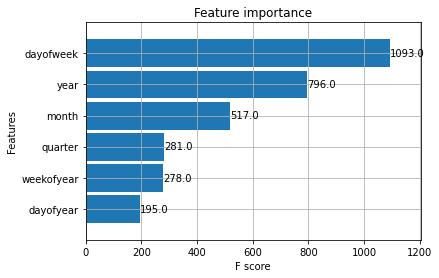

In [248]:
_ = plot_importance(xgb_reg, height=0.9)

Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.

In [249]:
df_test["#Passengers-predicted"] = xgb_reg.predict(X_test)
df_full = pd.concat([df_test, df_train], sort = False)

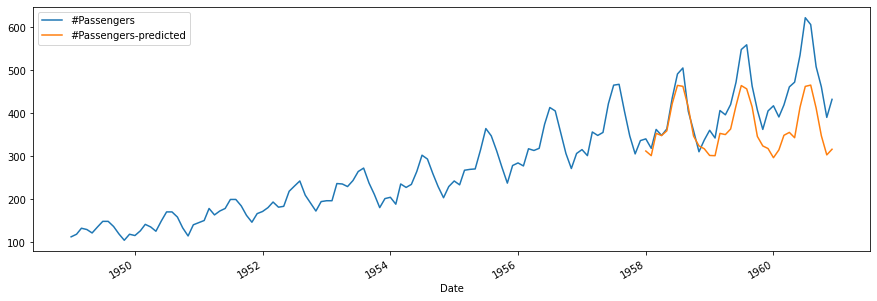

In [250]:
_ = df_full[['#Passengers','#Passengers-predicted']].plot(figsize=(15, 5))